In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")

In [12]:
df = train.copy()

In [13]:
df.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

## EDA
#### What is the distribution of loan_paid_back? Is there significant class imbalance, and if so, how severe (e.g., 90-10, 70-30)?

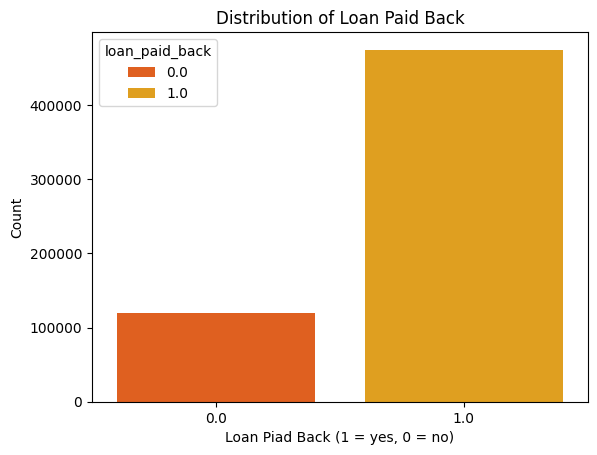

In [14]:
# Bar plot
sns.countplot(x='loan_paid_back', data=df, palette='autumn', hue='loan_paid_back')
plt.title('Distribution of Loan Paid Back')
plt.xlabel('Loan Piad Back (1 = yes, 0 = no)')
plt.ylabel('Count')
plt.show()

In [15]:
df['loan_paid_back'].value_counts(normalize=True)

loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64

> Which means **79%** of loans were paid back, **20%** were not.

#### For each numerical feature (credit_score, annual_income, debt_to_income_ratio, loan_amount, interest_rate), what are the distributions for paid vs not-paid loans? Are there clear separation patterns?

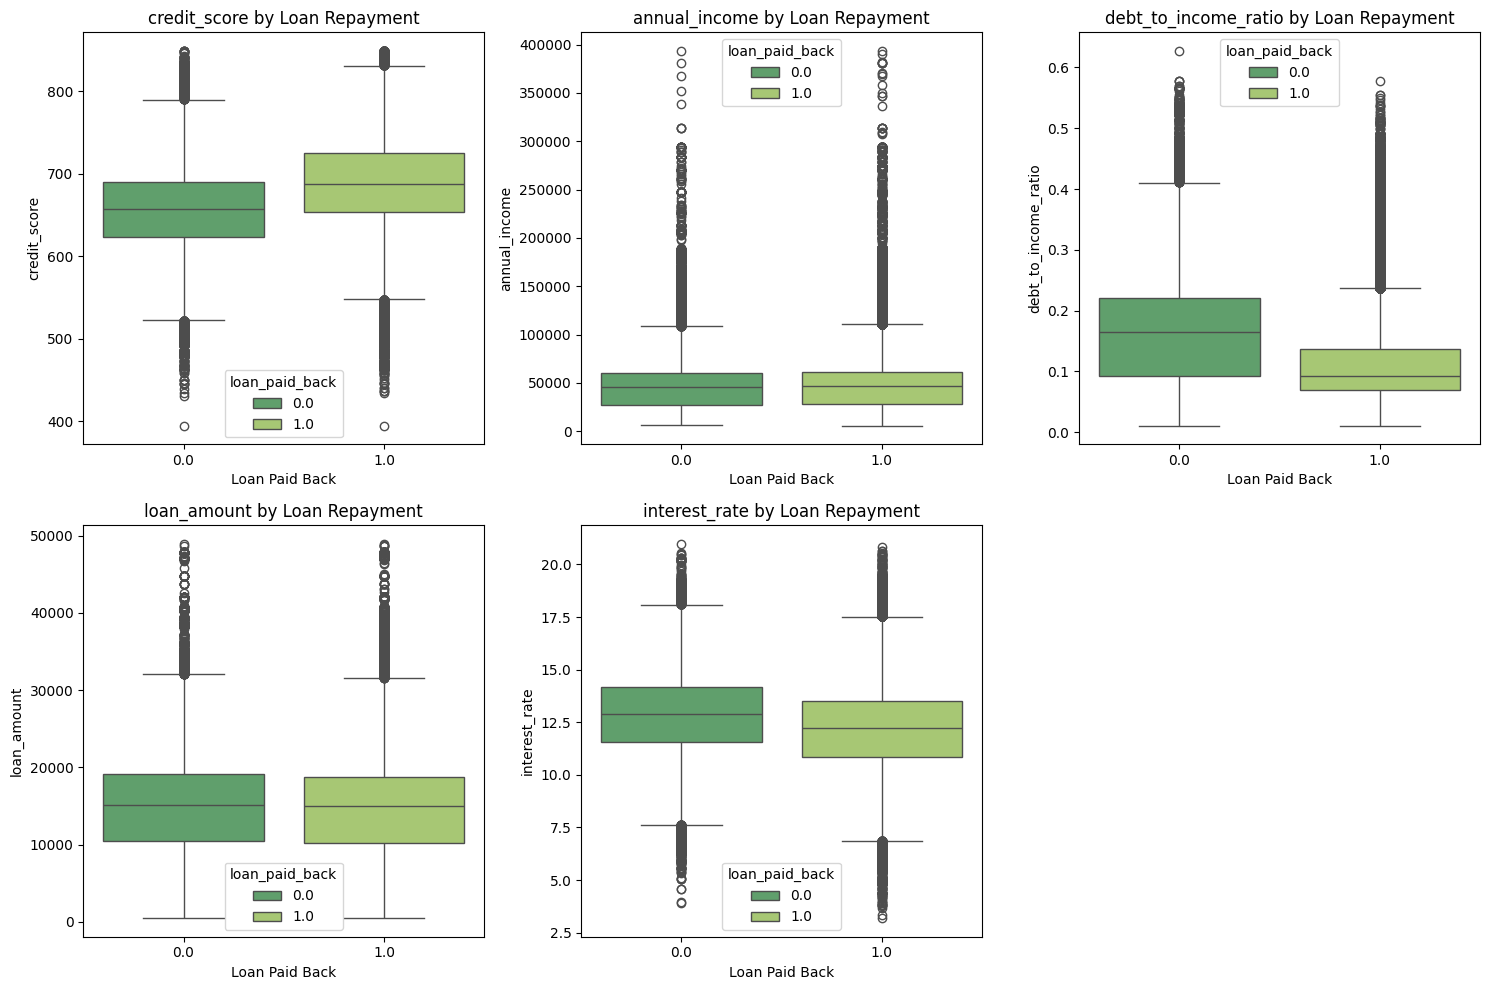

In [16]:
numerical_features = ['credit_score', 'annual_income', 'debt_to_income_ratio', 'loan_amount', 'interest_rate']

# Set up the figure
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='loan_paid_back', y=feature, data=df, palette='summer', hue='loan_paid_back')
    plt.title(f'{feature} by Loan Repayment')
    plt.xlabel('Loan Paid Back')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**credit_score vs loan_paid_back**  
Class 1 (paid back) has a higher median (~700) and tighter IQR (670–730)!  
Class 0 (not paid) has a lower median (~650) and IQR (620–680)!  
**Interpretation**: This shows moderate separation. Higher credit scores are associated with loan repayment.  

**debt_to_income_ratio vs loan_paid_back**  
Class 1: Lower median (~0.10), tighter spread.  
Class 0: Higher median (~0.15), wider spread.  
**Interpretation**: higher debt-to-income ratios correlate with default (strong signal).  

**interest_rate vs loan_paid_back**  
Class 1: Slightly lower median (~12.5)  
Class 0: Slightly higher median (~13)  
**Interpretation**: Weak to moderate separation, higher interest rates may reflect riskier borrowers.  

**annual_income vs loan_paid_back**  
Both classes have nearly identical distributions.  
**Interpretation**: No separation, income alone doesn’t distinguish repayment behavior.  

**loan_amount vs loan_paid_back**  
Identical distributions across classes.  
**Interpretation**: No separation, loan size isn’t predictive on its own.

#### What is the correlation matrix for numerical features? Are any features highly correlated with each other (>0.7 or >0.8)? 


In [17]:
corr_matrix = df[numerical_features].corr()
#corr_matrix

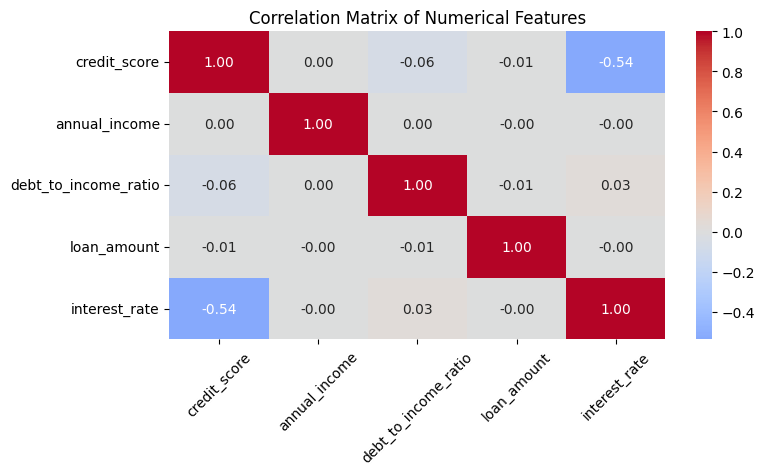

In [18]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

# Rotate x-axis and y-axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

Low pairwise correlation (near 0) between numerical features means:
1. They are not linearly related to each other.
2. Each feature may carry independent information.

#### For each categorical feature (loan_purpose, employment_status, education_level, grade_subgrade), what is the default rate per category? Which categories are highest/lowest risk?

In [19]:
loan_purpose_groups_default_rate = df.groupby('loan_purpose')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

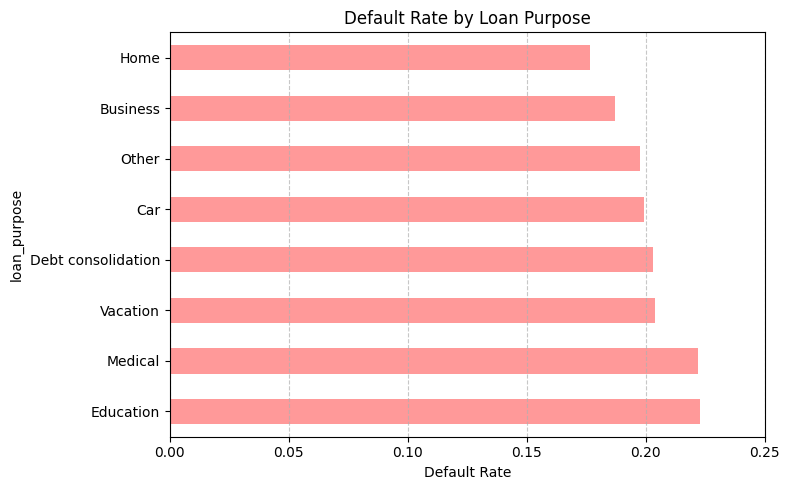

In [20]:
plt.figure(figsize=(8, 5))
loan_purpose_groups_default_rate.plot(kind='barh', color='#ff9999')
plt.xlabel('Default Rate')
plt.title('Default Rate by Loan Purpose')
plt.xlim(0, 0.25)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
gender_groups_default_rate = df.groupby('gender')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

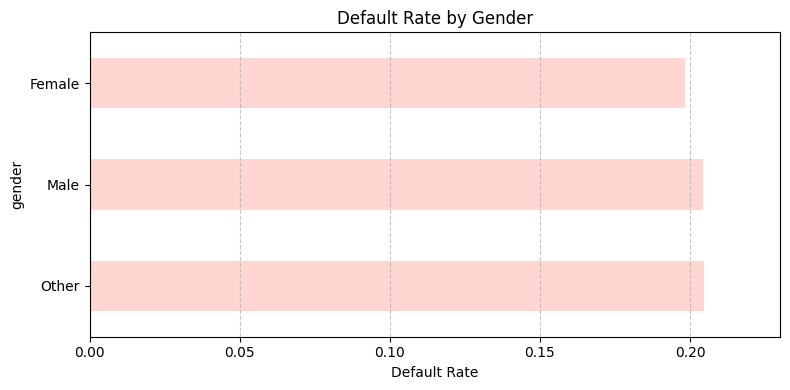

In [22]:
plt.figure(figsize=(8, 4))
gender_groups_default_rate.plot(kind='barh', color='#ff322133')
plt.xlabel('Default Rate')
plt.title('Default Rate by Gender')
plt.xlim(0, 0.23)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
marita_status_groups_default_rate = df.groupby('marital_status')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

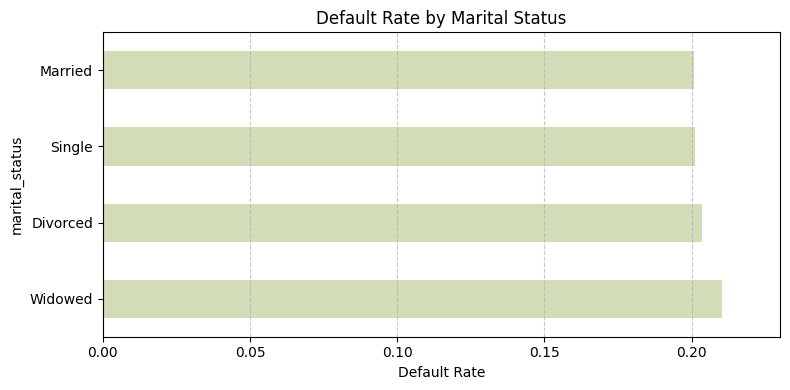

In [24]:
plt.figure(figsize=(8, 4))
marita_status_groups_default_rate.plot(kind='barh', color='#D2DCB6')
plt.xlabel('Default Rate')
plt.title('Default Rate by Marital Status')
plt.xlim(0, 0.23)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
employment_status_groups_default_rate = df.groupby("employment_status")['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

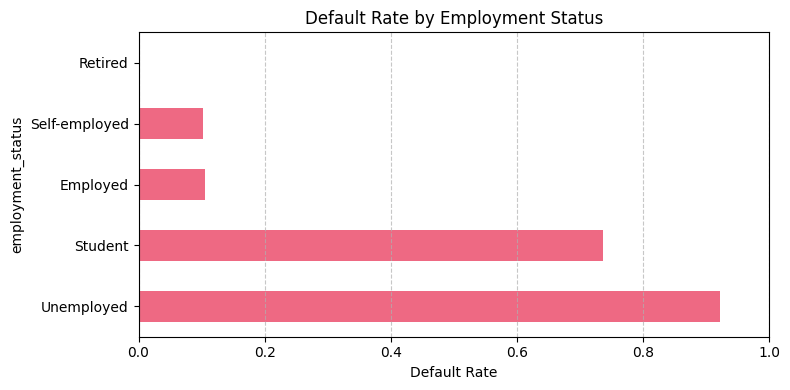

In [26]:
plt.figure(figsize=(8, 4))
employment_status_groups_default_rate.plot(kind='barh', color='#EE6983')
plt.xlabel('Default Rate')
plt.title('Default Rate by Employment Status')
plt.xlim(0, 1)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
grade_subgrade_groups_default_rate = df.groupby('grade_subgrade')['loan_paid_back'].apply(lambda x: 1 - x.mean()).sort_values(ascending=False)

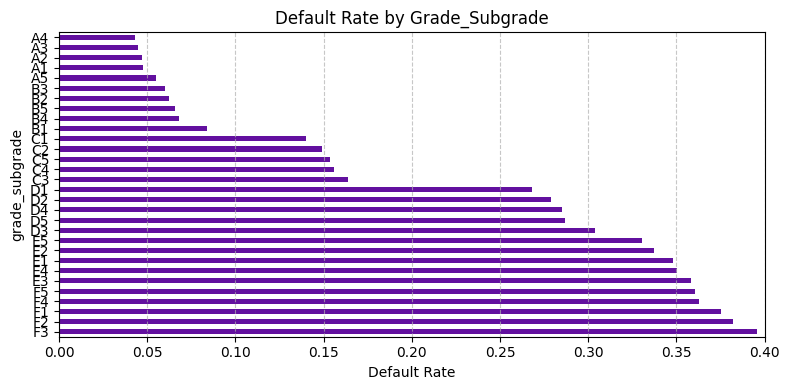

In [28]:
plt.figure(figsize=(8, 4))
grade_subgrade_groups_default_rate.plot(kind='barh', color='#62109F')
plt.xlabel('Default Rate')
plt.title('Default Rate by Grade_Subgrade')
plt.xlim(0, 0.4)  # since it's a proportion
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> Among the categorical features, employment_status and grade_subgrade show clear separation in default rates and are strong indicators of loan repayment risk!  
Other features like loan_purpose, gender, and marital_status show only minor differences and are likely weaker predictors.

#### How is grade_subgrade distributed? Does it already encode risk effectively (i.e., do higher grades have lower default rates)? Is this feature potentially leaking information?

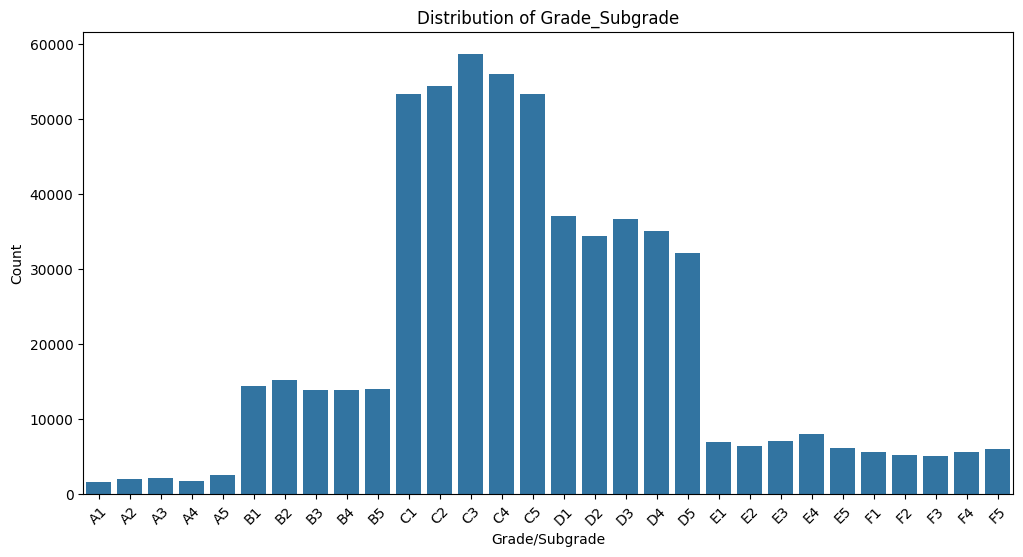

In [29]:
# Grade_Subrade distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='grade_subgrade', data=df, order=sorted(df['grade_subgrade'].unique()))
plt.xticks(rotation=45)
plt.title('Distribution of Grade_Subgrade')
plt.xlabel('Grade/Subgrade')
plt.ylabel('Count')
plt.show()

> The default rate increases steadily with worsening grades, that’s a strong signal.  
Most loans are in the B and C ranges, where default rates are moderate. The high-risk grades (E, F) are rare, so:  
They may not contribute much to overall model learning. But they’re still important for edge-case detection (e.g., flagging very risky loans).

> A model on this data, it may learn well for common grades (B, C), but struggle on rare ones (A, E, F)! 

> is potentially a **leak** if it’s derived from other features or assigned after the loan decision. We need to understand how and when it was created!  
If it’s a summary of risk based on our input features, it might make our model look smarter than it really is, but it won’t generalize well to new data.

In [30]:
df['grade_subgrade_encoded'] = df['grade_subgrade'].astype('category').cat.codes

In [31]:
features_to_check = ['grade_subgrade_encoded', 'credit_score', 'interest_rate', 'debt_to_income_ratio', 'annual_income', 'loan_amount']
corr_matrix = df[features_to_check].corr()

# Show correlations with grade_subgrade_encoded
#print(corr_matrix['grade_subgrade_encoded'].sort_values(ascending=False))

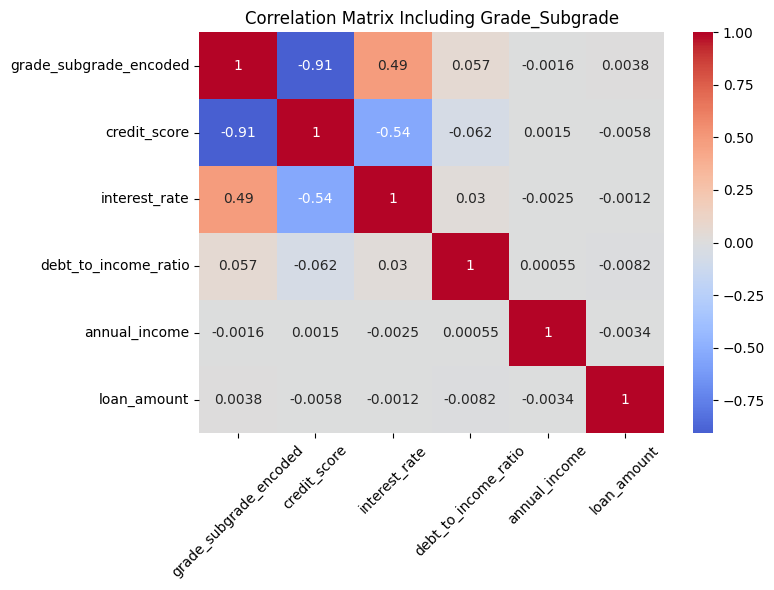

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Including Grade_Subgrade')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

> **grade_subgrade_encoded** has a -0.91 correlation with **credit_score**"! That’s an extremely strong negative correlation. It tells us:
1. As grade_subgrade_encoded increases (i.e., from A1 → F5), the credit score decreases.  
2. In other words: lower grades = lower credit scores.  

> This suggests that grade_subgrade is almost directly derived from credit score.  or at least, credit score is the dominant factor in how the grade is assigned!  

> **grade_subgrade_encoded** has a moderate positive correlation (0,49) with **interest_rate**;  
As grade_subgrade_encoded increases (riskier borrowers), the interest rate increases. (lenders charge higher interest to riskier borrowers)!  

**grade_subgrade** is not an independent feature, it’s a summary of other features, especially credit_score.
Including it in your model might:  
1. Boost performance (because it’s so predictive)
2. But also hide the true contribution of other features
3. And possibly leak information if it was assigned after the loan decision

#### What is the relationship between interest_rate and credit_score? Do people with low credit scores get high interest rates? Are there anomalies (low score + low rate)?

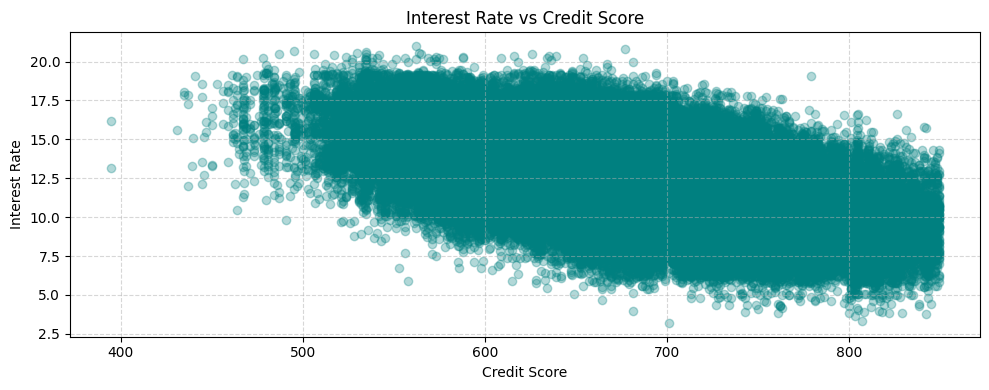

In [33]:
plt.figure(figsize=(10, 4))
plt.scatter(df['credit_score'], df['interest_rate'], alpha=0.3, color='teal')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs Credit Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

> A slightly negative trend overall → higher credit scores tend to get lower interest rates.  
1. Low credit scores (~500) → interest rates around 15–20%
2. High credit scores (>800) → interest rates drop to 5–12.5%

Low credit score → lender sees high risk → high interest rate  
High credit score → lender sees low risk → low interest rate  

> People with low credit scores get higher interest rates — this matches lender behavior: riskier borrowers are charged more!  
The trend is not perfectly linear, but the pattern is clear!

In [34]:
anomalies = df[(df['credit_score'] < 600) & (df['interest_rate'] < 10)]
#print(anomalies[['credit_score', 'interest_rate']])

#### What is the distribution of loan_amount / annual_income ratio? What percentage of borrowers have loans exceeding their annual income? 

In [35]:
df['loan_to_income_ratio'] = df['loan_amount'] / df['annual_income']

# 0.25	Loan is 25% of income	Borrower earns 400,000 SEK/year and borrows 100,000 SEK
# 1.5	Loan is 150% of income	Borrower earns 200,000 SEK/year and borrows 300,000 SEK

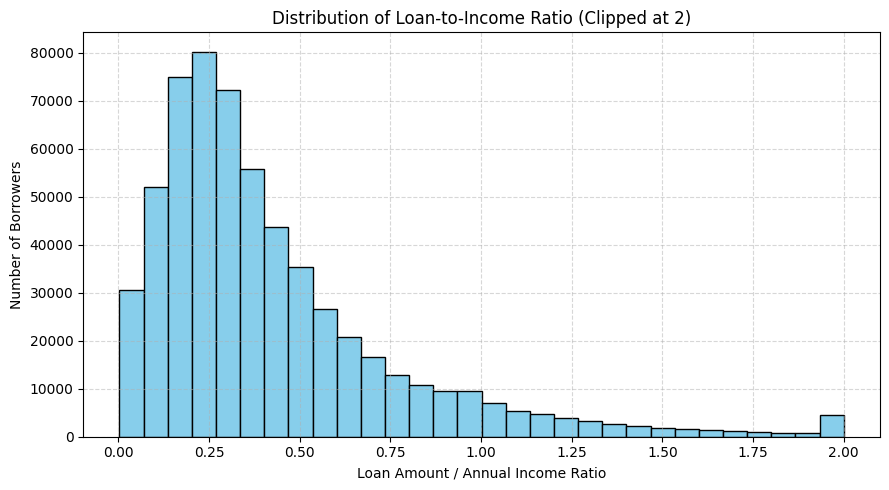

In [36]:
clipped_ratio = df['loan_to_income_ratio'].clip(upper=2)

# Plot histogram
plt.figure(figsize=(9, 5))
plt.hist(clipped_ratio, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Loan Amount / Annual Income Ratio')
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Loan-to-Income Ratio (Clipped at 2)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [37]:
high_ratio_pct = (df['loan_to_income_ratio'] > 1).mean()
print(f"{high_ratio_pct:.2%} of borrowers have loans exceeding their annual income.")

7.28% of borrowers have loans exceeding their annual income.


#### What's the relationship between loan_amount / annual_income ratio and default rate?

In [52]:
default_rate = (
    df.groupby('ratio_bin')['loan_paid_back'].apply(lambda x: (x == 0).mean())
    .reset_index(name='default_rate')
)

C:\Users\Farhad\AppData\Local\Temp\ipykernel_12184\1259879851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ratio_bin')['loan_paid_back'].apply(lambda x: (x == 0).mean())


In [53]:
default_rate.head()

,ratio_bin,default_rate
0,0-0.1,0.202612
1,0.1-0.2,0.193361
2,0.2-0.3,0.197098
3,0.3-0.5,0.203111
4,0.5-1,0.208182


In [49]:
bins = [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5]
labels = [f"{bins[i]}-{bins[i + 1]}" for i in range(len(bins) - 1)]
df['ratio_bin'] = pd.cut(
    df['loan_to_income_ratio'], bins=bins, labels=labels, include_lowest=True
)

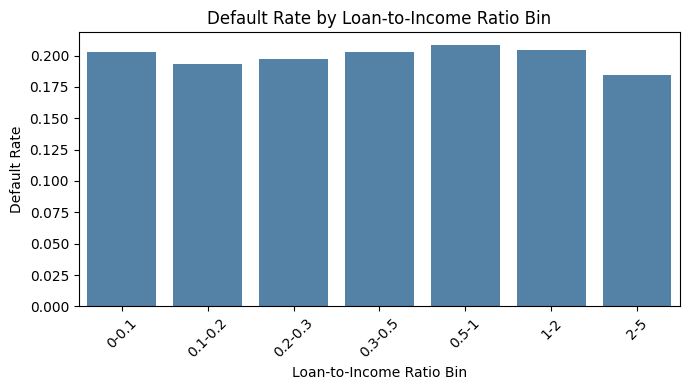

In [55]:
plt.figure(figsize=(7,4))
sns.barplot(data=default_rate, x='ratio_bin', y='default_rate', color='steelblue')
plt.title('Default Rate by Loan-to-Income Ratio Bin')
plt.xlabel('Loan-to-Income Ratio Bin')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Default rates across bins are very similar (around 17.5%–20%).  
Loan-to-income ratio may not be a strong differentiator of default risk in your dataset. Borrowers with higher ratios don’t seem to default much more often than those with lower ratios.

#### How does debt_to_income_ratio * loan_amount (total debt burden) relate to defaults?

In [57]:
df['total_debt_burden'] = df['debt_to_income_ratio'] * df['loan_amount']


In [58]:
bins = pd.qcut(df['total_debt_burden'], q=10)  # deciles
df['burden_bin'] = bins


In [61]:
default_rate = (
    df.groupby('burden_bin')['loan_paid_back']
    .apply(lambda x: (x == 0).mean())
    .reset_index(name='default_rate')
)

C:\Users\Farhad\AppData\Local\Temp\ipykernel_12184\1435520803.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('burden_bin')['loan_paid_back']


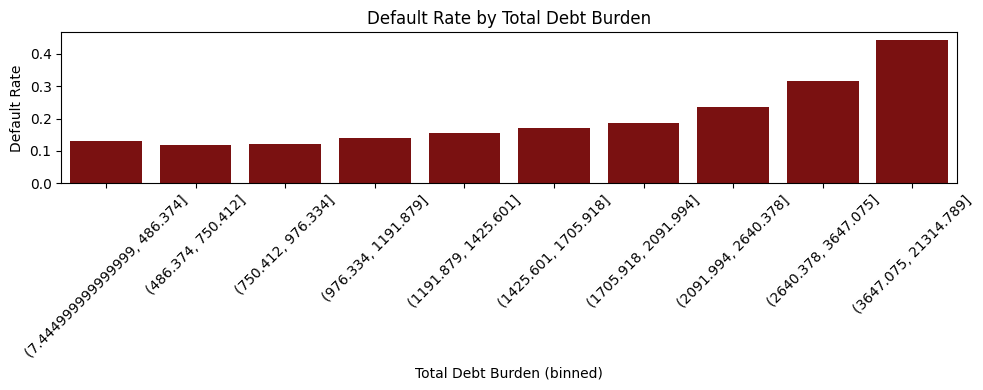

In [64]:
plt.figure(figsize=(10,4))
sns.barplot(data=default_rate, x='burden_bin', y='default_rate', color='darkred')
plt.title('Default Rate by Total Debt Burden')
plt.xlabel('Total Debt Burden (binned)')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> The default rate consistently increases across bins, this feature might be a strong candidate for our model. It has predictive power.  
> total_debt_burden might be more informative than loan_amount or debt_to_income_ratio alone, because it captures their interaction.  

#### How does default rate vary across combinations of employment_status and loan_purpose?

In [65]:
grouped = (
    df.groupby(['employment_status', 'loan_purpose'])['loan_paid_back']
    .apply(lambda x: (x == 0).mean())
    .reset_index(name='default_rate')
)

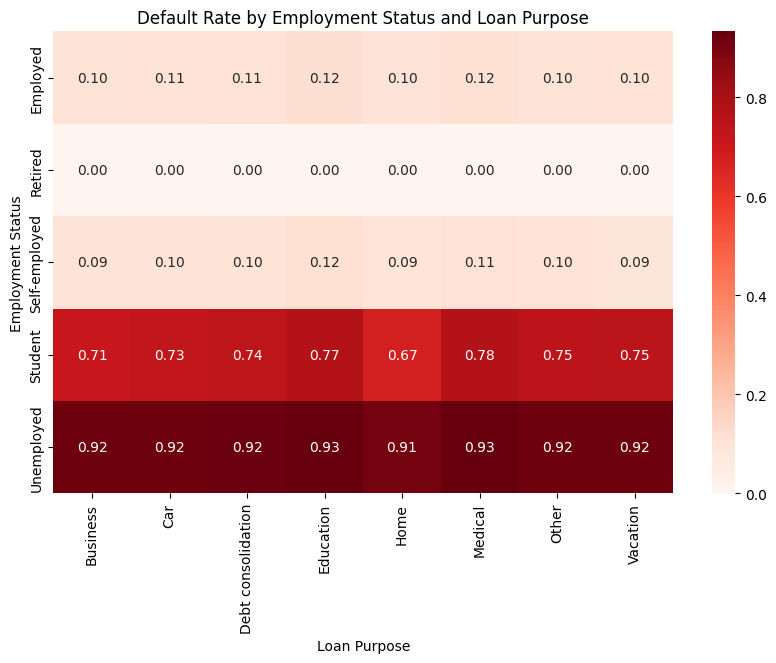

In [66]:
pivot = grouped.pivot(index='employment_status', columns='loan_purpose', values='default_rate')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt=".2f")
plt.title('Default Rate by Employment Status and Loan Purpose')
plt.ylabel('Employment Status')
plt.xlabel('Loan Purpose')
plt.show()

> Retired = 0.0 across all loan purposes (Retired borrowers in your dataset never defaulted!)  
Employed & Self-employed ≈ 0.10–0.12 (Both groups show relatively low and stable default rates across all loan purposes. Loan purpose doesn’t seem to matter much for these groups — risk is consistent.)  
Student = 0.67–0.77 (Extremely high default rates, This group is a clear risk flag in the dataset.)  
Unemployed = 0.91–0.93 (Nearly universal default, Loan purpose again doesn’t matter — the lack of income dominates risk.)

> default risk is overwhelmingly driven by employment status, not loan purpose. Loan purpose doesn’t change the story much — the borrower’s income situation is the key.

In [67]:
retired_sample_size = df[df['employment_status'].str.lower() == 'retired']

In [68]:
retired_sample_size.shape

(16453, 18)

### Within each education_level, how does the credit_score distribution differ, and does this affect default rates?

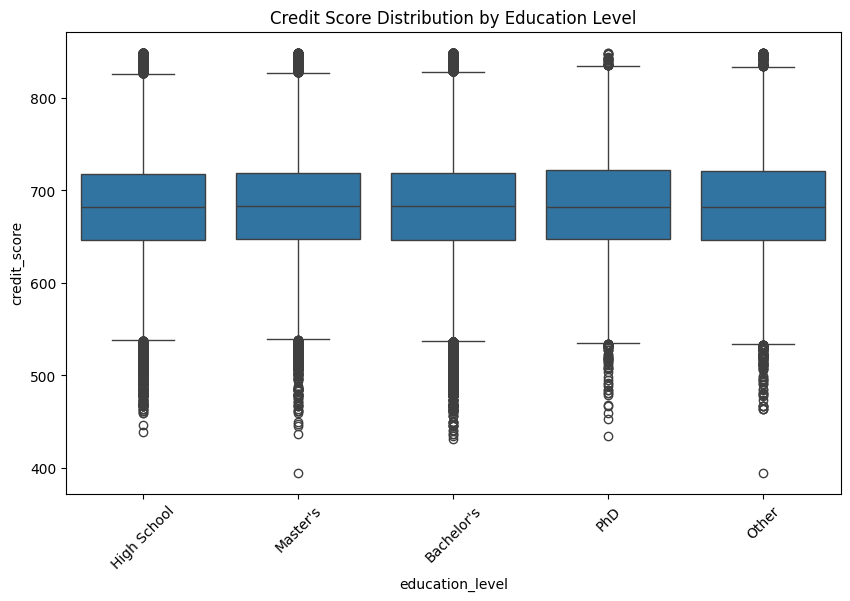

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='education_level', y='credit_score')
plt.title('Credit Score Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

In [70]:
default_rate = (
    df.groupby('education_level')['loan_paid_back']
    .apply(lambda x: (x==0).mean())
    .reset_index(name='default_rate')
)
print(default_rate)

  education_level  default_rate
0      Bachelor's      0.211108
1     High School      0.190302
2        Master's      0.197654
3           Other      0.197211
4             PhD      0.169933


> education level does not differentiate credit score!  
> PhD borrowers default slightly less, while Bachelor’s borrowers default slightly more. But the differences are minor compared to employment status or debt-to-income ratio.

In [59]:
df.head(2)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back,grade_subgrade_encoded,loan_to_income_ratio,ratio_bin,total_debt_burden,burden_bin
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0,12,0.086094,0-0.1,212.38728,"(7.444999999999999, 486.374]"
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0,17,0.207757,0.2-0.3,762.45460,"(750.412, 976.334]"
